In [2]:
import sys
import glob
import xarray as xr
import pandas as pd
import numpy as np

processing_mode = 'realtime' # or realtime
nc_path = './'+processing_mode+'/nc/'


traj_file_name = sorted(glob.glob(nc_path + '*{}*.nc'.format('trajectory')))
data = xr.open_dataset(traj_file_name[0], engine='netcdf4', decode_times=False)
raw_data = xr.open_dataset(traj_file_name[0], engine='netcdf4', group='glider_record', decode_times=False)#
raw_data = raw_data.sortby('time').to_dataframe().reset_index()
data = data.sortby('time').to_dataframe().reset_index()

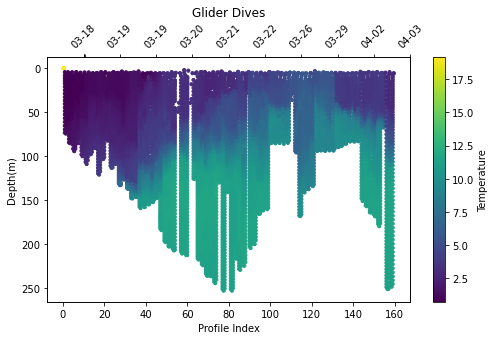

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
from datetime import datetime

# convert timestamps to datetime objects
time = [datetime.fromtimestamp(ts) for ts in data['time']]

# sub-sample the time list to reduce the number of ticks
n_ticks = 10
step = len(time) // n_ticks
time_ticks = time[::step]

# plotting the figure
fig, ax = plt.subplots(figsize=(7,4))
sc = ax.scatter(data['profile_index'], data['depth'], c=data['temperature'], cmap='viridis', s=10)
plt.colorbar(sc, label='Temperature')
ax.set(xlabel='Profile Index', ylabel='Depth(m)', title='Glider Dives')
ax.invert_yaxis()

# format the x-axis to display the profile index as an integer
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))

# add second x-axis for time stamps
ax2 = ax.twiny()
ax2.set_xlabel('')
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels([t.strftime('%m-%d') for t in time_ticks])

# set the first x-tick of the time axis to match the first profile index
start_time = time[0].replace(hour=0, minute=0, second=0)
start_profile = data['profile_index'][0]
offset = (start_time - time[0]).total_seconds() / 3600 / 24
ax2.set_xticks([start_profile, start_profile+offset]+list(ax.get_xticks())[1:])

# rotate the x-axis tick labels
plt.xticks(rotation=45)

# setting background color to white and reducing padding
fig.patch.set_facecolor('white')
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.95, wspace=0.2)
fig.savefig(processing_mode+'_temperature.png', dpi=100, bbox_inches='tight')

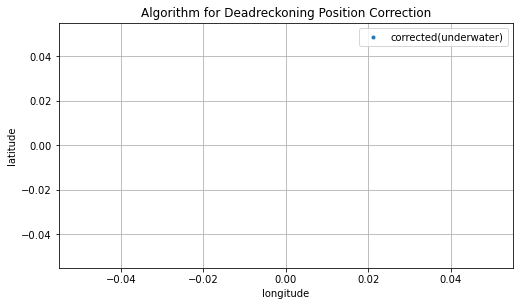

In [4]:
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(data['lon_qc'],data['lat_qc'],'.',label='corrected(underwater)')
#ax.plot(raw_data['m_gps_lon'],raw_data['m_gps_lat'],'o',label='GPS(surface)')
ax.set(xlabel='longitude', ylabel='latitude',
       title='Algorithm for Deadreckoning Position Correction')
ax.grid()
ax.legend()
fig.patch.set_facecolor('white')
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.95)

fig.savefig(processing_mode+'_track.png', dpi=100, bbox_inches='tight')

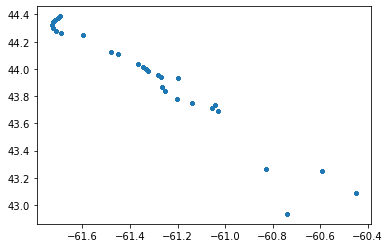

In [5]:
plt.plot(data['profile_lon'],data['profile_lat'],'.')